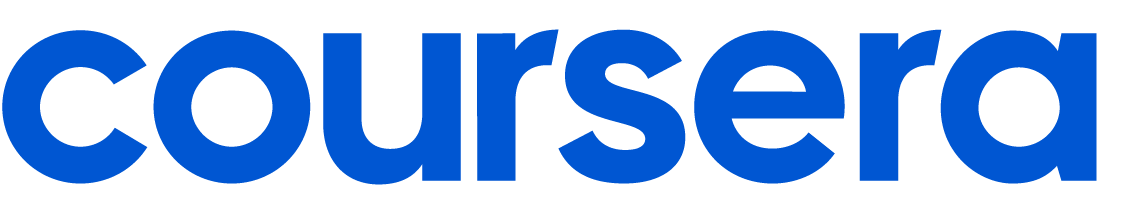

# Welcome to the Data Science Coding Challange!

Test your skills in a real-world coding challenge. Coding Challenges provide CS & DS Coding Competitions with Prizes and achievement badges!

CS & DS learners want to be challenged as a way to evaluate if they’re job ready. So, why not create fun challenges and give winners something truly valuable such as complimentary access to select Data Science courses, or the ability to receive an achievement badge on their Coursera Skills Profile - highlighting their performance to recruiters.

## Introduction

In this challenge, you'll get the opportunity to tackle one of the most industry-relevant machine learning problems with a unique dataset that will put your modeling skills to the test. Financial loan services are leveraged by companies across many industries, from big banks to financial institutions to government loans. One of the primary objectives of companies with financial loan services is to decrease payment defaults and ensure that individuals are paying back their loans as expected. In order to do this efficiently and systematically, many companies employ machine learning to predict which individuals are at the highest risk of defaulting on their loans, so that proper interventions can be effectively deployed to the right audience.

In this challenge, we will be tackling the loan default prediction problem on a very unique and interesting group of individuals who have taken financial loans. 

Imagine that you are a new data scientist at a major financial institution and you are tasked with building a model that can predict which individuals will default on their loan payments. We have provided a dataset that is a sample of individuals who received loans in 2021. 

This financial institution has a vested interest in understanding the likelihood of each individual to default on their loan payments so that resources can be allocated appropriately to support these borrowers. In this challenge, you will use your machine learning toolkit to do just that!

## Understanding the Datasets

### Train vs. Test
In this competition, you’ll gain access to two datasets that are samples of past borrowers of a financial institution that contain information about the individual and the specific loan. One dataset is titled `train.csv` and the other is titled `test.csv`.

`train.csv` contains 70% of the overall sample (255,347 borrowers to be exact) and importantly, will reveal whether or not the borrower has defaulted on their loan payments (the “ground truth”).

The `test.csv` dataset contains the exact same information about the remaining segment of the overall sample (109,435 borrowers to be exact), but does not disclose the “ground truth” for each borrower. It’s your job to predict this outcome!

Using the patterns you find in the `train.csv` data, predict whether the borrowers in `test.csv` will default on their loan payments, or not.

### Dataset descriptions
Both `train.csv` and `test.csv` contain one row for each unique Loan. For each Loan, a single observation (`LoanID`) is included during which the loan was active. 

In addition to this identifier column, the `train.csv` dataset also contains the target label for the task, a binary column `Default` which indicates if a borrower has defaulted on payments.

Besides that column, both datasets have an identical set of features that can be used to train your model to make predictions. Below you can see descriptions of each feature. Familiarize yourself with them so that you can harness them most effectively for this machine learning task!

In [1]:
import pandas as pd

data_descriptions = pd.read_csv("data_descriptions.csv")
pd.set_option("display.max_colwidth", None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,LoanID,Identifier,string,A unique identifier for each loan.
1,Age,Feature,integer,The age of the borrower.
2,Income,Feature,integer,The annual income of the borrower.
3,LoanAmount,Feature,integer,The amount of money being borrowed.
4,CreditScore,Feature,integer,"The credit score of the borrower, indicating their creditworthiness."
5,MonthsEmployed,Feature,integer,The number of months the borrower has been employed.
6,NumCreditLines,Feature,integer,The number of credit lines the borrower has open.
7,InterestRate,Feature,float,The interest rate for the loan.
8,LoanTerm,Feature,integer,The term length of the loan in months.
9,DTIRatio,Feature,float,"The Debt-to-Income ratio, indicating the borrower's debt compared to their income."


## How to Submit your Predictions to Coursera
Submission Format:

In this notebook you should follow the steps below to explore the data, train a model using the data in `train.csv`, and then score your model using the data in `test.csv`. Your final submission should be a dataframe (call it `prediction_df` with two columns and exactly 109,435 rows (plus a header row). The first column should be `LoanID` so that we know which prediction belongs to which observation. The second column should be called `predicted_probability` and should be a numeric column representing the __likelihood that the borrower will default__.

Your submission will show an error if you have extra columns (beyond `LoanID` and `predicted_probability`) or extra rows. The order of the rows does not matter.

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `LoanID` and `predicted_probability`!

To determine your final score, we will compare your `predicted_probability` predictions to the source of truth labels for the observations in `test.csv` and calculate the [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). We choose this metric because we not only want to be able to predict which loans will default, but also want a well-calibrated likelihood score that can be used to target interventions and support most accurately.

## Import Python Modules

First, import the primary modules that will be used in this project. Remember as this is an open-ended project please feel free to make use of any of your favorite libraries that you feel may be useful for this challenge. For example some of the following popular packages may be useful:

- pandas
- numpy
- Scipy
- Scikit-learn
- keras
- maplotlib
- seaborn
- etc, etc

In [2]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


## Load the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [3]:
train_df = pd.read_csv("train.csv")
print("train_df Shape:", train_df.shape)
train_df.head()

train_df Shape: (255347, 18)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [4]:
test_df = pd.read_csv("test.csv")
print("test_df Shape:", test_df.shape)
test_df.head()

test_df Shape: (109435, 17)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,7RYZGMKJIR,32,131645,43797,802,23,2,6.10,24,0.13,High School,Full-time,Divorced,Yes,No,Other,No
1,JDL5RH07AM,61,134312,18402,369,87,2,12.99,60,0.59,High School,Self-employed,Single,No,No,Business,Yes
2,STAL716Y79,55,115809,151774,563,3,3,5.51,48,0.82,Bachelor's,Full-time,Single,Yes,Yes,Other,Yes
3,SO0KKJ3IQB,58,94970,55789,337,24,1,23.93,36,0.77,Bachelor's,Unemployed,Divorced,No,No,Business,No
4,T99CWTYDCP,63,71727,189798,451,52,3,22.05,48,0.44,PhD,Unemployed,Single,Yes,No,Auto,No


## Explore, Clean, Validate, and Visualize the Data (optional)

Feel free to explore, clean, validate, and visualize the data however you see fit for this competition to help determine or optimize your predictive model. Please note - the final autograding will only be on the accuracy of the `prediction_df` predictions.

### Data Exploration and Understanding

#### Handling Missing Values

In [5]:
# Detecting missing values
missing_values = train_df.isnull().sum()

missing_values

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

#### Feature Distribution

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


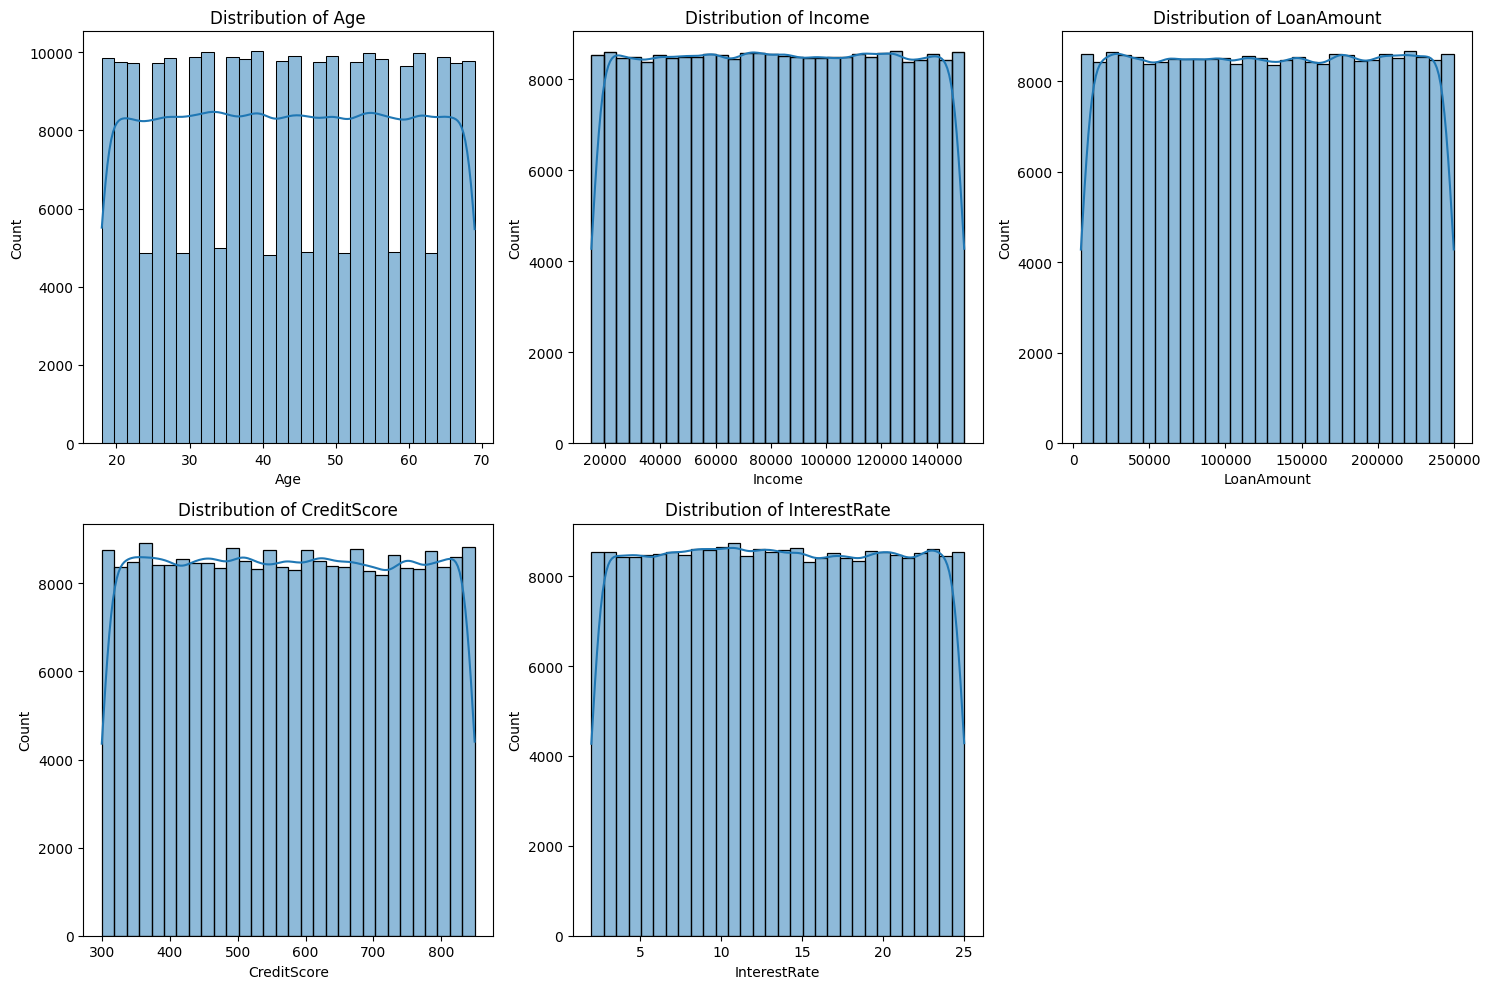

In [6]:
# Displaying statistical summary of numerical features
numerical_summary = train_df.describe()

# Plotting the distribution for a few key numerical features
features_to_plot = ["Age", "Income", "LoanAmount", "CreditScore", "InterestRate"]

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(train_df[feature], bins=30, kde=True)
    plt.title(f"Distribution of {feature}")
    plt.tight_layout()

numerical_summary

#### Target Column Balance

0    88.387175
1    11.612825
Name: Default, dtype: float64

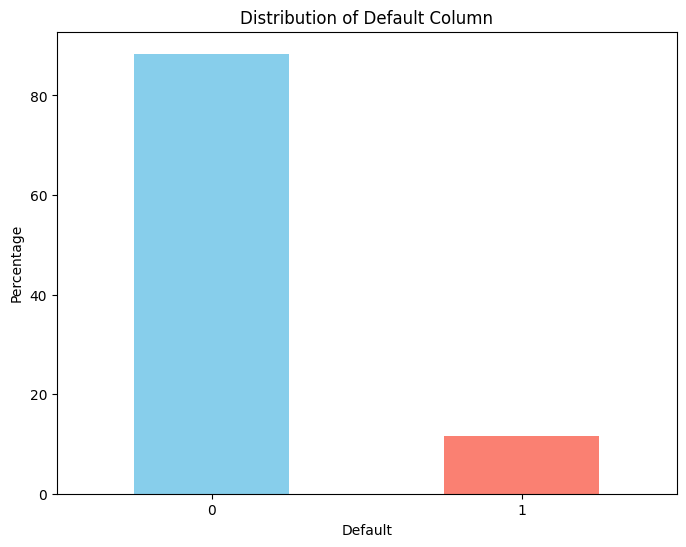

In [7]:
# Analyzing the balance in the 'Default' column
default_balance = train_df["Default"].value_counts(normalize=True) * 100

# Plotting the balance
plt.figure(figsize=(8, 6))
default_balance.plot(kind="bar", color=["skyblue", "salmon"])
plt.title("Distribution of Default Column")
plt.xlabel("Default")
plt.ylabel("Percentage")
plt.xticks(rotation=0)

default_balance

### Data Cleaning

#### Outlier Detection & Handling

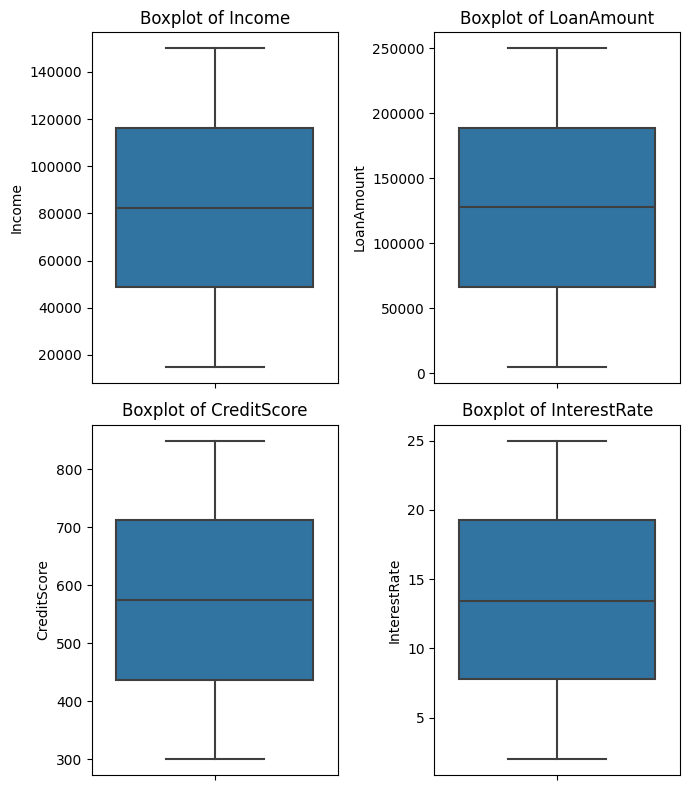

In [8]:
# Plotting boxplots for key numerical features to detect outliers
features_for_outliers = ["Income", "LoanAmount", "CreditScore", "InterestRate"]

plt.figure(figsize=(7, 8))

for i, feature in enumerate(features_for_outliers, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=train_df[feature])
    plt.title(f"Boxplot of {feature}")
    plt.tight_layout()

#### Convert String Categorical Columns to Binary Format

In [9]:
# Convert string categorical columns to binary format
binary_columns = ["HasMortgage", "HasDependents", "HasCoSigner"]

# Mapping 'Yes' to 1 and 'No' to 0
binary_mapping = {"Yes": 1, "No": 0}

for column in binary_columns:
    train_df[column] = train_df[column].map(binary_mapping)

# Displaying the changes
train_df[binary_columns].head()

,HasMortgage,HasDependents,HasCoSigner
0,1,1,1
1,0,0,1
2,1,1,0
3,0,0,0
4,0,1,0


### Feature Engineering

#### Binning

In [10]:
# Binning Age into categories
bins_age = [18, 35, 55, 70]
labels_age = ["Young", "Middle-aged", "Senior"]
train_df["AgeGroup"] = pd.cut(train_df["Age"], bins=bins_age, labels=labels_age, right=False)

# Binning CreditScore into categories
bins_score = [300, 500, 660, 780, 850]
labels_score = ["Poor", "Average", "Good", "Excellent"]
train_df["CreditCategory"] = pd.cut(train_df["CreditScore"], bins=bins_score, labels=labels_score, right=False)

# Displaying the changes
train_df[["Age", "AgeGroup", "CreditScore", "CreditCategory"]].head()

,Age,AgeGroup,CreditScore,CreditCategory
0,56,Senior,520,Average
1,69,Senior,458,Poor
2,46,Middle-aged,451,Poor
3,32,Young,743,Good
4,60,Senior,633,Average


#### Encoding

In [11]:
# One-hot encoding for categorical features
categorical_features = ["Education", "EmploymentType", "MaritalStatus", "LoanPurpose", "AgeGroup", "CreditCategory"]

train_df_encoded = pd.get_dummies(train_df, columns=categorical_features, drop_first=True)

# Displaying the changes
train_df_encoded.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,...,MaritalStatus_Single,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,AgeGroup_Middle-aged,AgeGroup_Senior,CreditCategory_Average,CreditCategory_Good,CreditCategory_Excellent
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,...,0,0,0,0,1,0,1,1,0,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,...,0,0,0,0,1,0,1,0,0,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,...,0,0,0,0,0,1,0,0,0,0
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,...,0,1,0,0,0,0,0,0,1,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,...,0,0,0,0,0,0,1,1,0,0


#### Interaction Terms

In [12]:
# Creating the Income-to-LoanAmount ratio feature
# train_df_encoded['Income_to_LoanAmount'] = train_df_encoded['Income'] / train_df_encoded['LoanAmount']

# Displaying the changes
# train_df_encoded[['Income', 'LoanAmount', 'Income_to_LoanAmount']].head()

#### Polynomial Features

In [13]:
# Creating polynomial features for Income and LoanAmount
# train_df_encoded['Income_squared'] = train_df_encoded['Income'] ** 2
# train_df_encoded['LoanAmount_squared'] = train_df_encoded['LoanAmount'] ** 2

# Displaying the changes
# train_df_encoded[['Income', 'Income_squared', 'LoanAmount', 'LoanAmount_squared']].head()

## Make predictions (required)

Remember you should create a dataframe named `prediction_df` with exactly 109,435 entries plus a header row attempting to predict the likelihood of borrowers to default on their loans in `test_df`. Your submission will throw an error if you have extra columns (beyond `LoanID` and `predicted_probaility`) or extra rows.

The file should have exactly 2 columns:
`LoanID` (sorted in any order)
`predicted_probability` (contains your numeric predicted probabilities between 0 and 1, e.g. from `estimator.predict_proba(X, y)[:, 1]`)

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `LoanID` and `predicted_probability`!

### Example prediction submission:

The code below is a very naive prediction method that simply predicts loan defaults using a Dummy Classifier. This is used as just an example showing the submission format required. Please change/alter/delete this code below and create your own improved prediction methods for generating `prediction_df`.

#### Feature Scaling

In [14]:
from sklearn.preprocessing import StandardScaler

# Dropping the LoanID column
train_df_encoded.drop("LoanID", axis=1, inplace=True)

# Separating the target variable
X = train_df_encoded.drop("Default", axis=1)
y = train_df_encoded["Default"]

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Displaying the scaled features
pd.DataFrame(X_scaled, columns=X.columns).head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,HasMortgage,...,MaritalStatus_Single,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,AgeGroup_Middle-aged,AgeGroup_Senior,CreditCategory_Average,CreditCategory_Good,CreditCategory_Excellent
0,0.833990,0.089693,-1.086833,-0.341492,0.590533,1.341937,0.261771,-0.001526,-0.260753,0.999973,...,-0.706461,-0.501398,-0.499606,-0.501325,2.003812,-0.790927,1.571144,1.559410,-0.524927,-0.383571
1,1.701221,-0.823021,-0.044309,-0.731666,-1.285731,-1.343791,-1.308350,1.412793,0.778585,-1.000027,...,-0.706461,-0.501398,-0.499606,-0.501325,2.003812,-0.790927,1.571144,-0.641268,-0.524927,-0.383571
2,0.166888,0.043854,0.022715,-0.775718,-0.968209,0.446694,1.156831,-0.708685,-0.823728,0.999973,...,-0.706461,-0.501398,-0.499606,-0.501325,-0.499049,1.264340,-0.636479,-0.641268,-0.524927,-0.383571
3,-0.767053,-1.303452,-1.168538,1.061875,-1.718715,0.446694,-0.967805,-0.708685,-1.170174,-1.000027,...,-0.706461,1.994422,-0.499606,-0.501325,-0.499049,-0.790927,-0.636479,-0.641268,1.905025,-0.383571
4,1.100830,-1.592855,-1.671921,0.369631,-1.487790,1.341937,-1.052188,0.705634,0.995114,-1.000027,...,-0.706461,-0.501398,-0.499606,-0.501325,-0.499049,-0.790927,1.571144,1.559410,-0.524927,-0.383571


#### Data Splitting

In [15]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, train_size=0.7, test_size=0.3, random_state=42, stratify=y)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((178742, 29), (76605, 29), (178742,), (76605,))

#### Upsampling

In [16]:
from imblearn.over_sampling import SMOTE

# Using SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Checking the new class distribution
new_class_distribution = pd.Series(y_train_resampled).value_counts(normalize=True) * 100

new_class_distribution

0    50.0
1    50.0
Name: Default, dtype: float64

#### Model Selection and Training

In [17]:
weights = train_df["Default"].value_counts()
weights = weights[0] / weights[1]
weights

7.61116919030115

In [18]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Assuming you've already oversampled your data using SMOTE
# and have X_train_resampled and y_train_resampled ready

# Initializing and training the XGBoost classifier with adjusted hyperparameters
xgb_model = xgb.XGBClassifier(
    objective="binary:logistic",
    random_state=42,
    scale_pos_weight=1,
    eval_metric="auc",
    max_depth=10,
    learning_rate=0.1,
    n_estimators=100,
)
xgb_model.fit(X_train, y_train)

# Making predictions on the validation set
y_pred_xgb = xgb_model.predict(X_val)

# Calculating accuracy on the validation set
accuracy_xgb = accuracy_score(y_val, y_pred_xgb)
classification_rep_xgb = classification_report(y_val, y_pred_xgb)

print(f"Accuracy: {accuracy_xgb}")
print(classification_rep_xgb)

Accuracy: 0.885634096991058
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     67709
           1       0.55      0.08      0.14      8896

    accuracy                           0.89     76605
   macro avg       0.72      0.54      0.54     76605
weighted avg       0.85      0.89      0.85     76605



#### Test Predictions

In [19]:
# Preprocessing the test data

# Convert string categorical columns to binary format
for column in binary_columns:
    test_df[column] = test_df[column].map(binary_mapping)

# Binning Age and CreditScore into categories
test_df["AgeGroup"] = pd.cut(test_df["Age"], bins=bins_age, labels=labels_age, right=False)
test_df["CreditCategory"] = pd.cut(test_df["CreditScore"], bins=bins_score, labels=labels_score, right=False)

# One-hot encoding for categorical features
test_df_encoded = pd.get_dummies(test_df, columns=categorical_features, drop_first=True)

# Creating polynomial features
test_df_encoded["Income_squared"] = test_df_encoded["Income"] ** 2
test_df_encoded["LoanAmount_squared"] = test_df_encoded["LoanAmount"] ** 2

# Creating the Income-to-LoanAmount ratio feature
test_df_encoded["Income_to_LoanAmount"] = test_df_encoded["Income"] / test_df_encoded["LoanAmount"]

# Ensuring the test data has the same columns as the training data (in case of missing categories)
missing_cols = set(train_df_encoded.columns) - set(test_df_encoded.columns) - {"Default"}
for column in missing_cols:
    test_df_encoded[column] = 0

# Reordering the test dataframe columns to match the training dataframe
test_df_encoded = test_df_encoded[train_df_encoded.drop("Default", axis=1).columns]

# Scaling the test data
X_test = scaler.transform(test_df_encoded)

# Making predictions on the test data
predicted_probability = xgb_model.predict_proba(X_test)[:, 1]

# Combining predictions with LoanID column into a dataframe
prediction_df = pd.DataFrame(
    {
        "LoanID": test_df["LoanID"].values,
        "predicted_probability": predicted_probability,
    }
)

print(prediction_df.shape)
prediction_df.head(10)

(109435, 2)


,LoanID,predicted_probability
0,7RYZGMKJIR,0.065646
1,JDL5RH07AM,0.025116
2,STAL716Y79,0.023268
3,SO0KKJ3IQB,0.231333
4,T99CWTYDCP,0.093796
5,0SNHFWV4UP,0.072409
6,S6ITP6LGYS,0.040019
7,A6I7U12IRJ,0.042934
8,8W6KY50JU4,0.045085
9,THFQ08OLMU,0.111238


## Final Tests - **IMPORTANT** - the cells below must be run prior to submission

Below are some tests to ensure your submission is in the correct format for autograding. The autograding process accepts a csv `prediction_submission.csv` which we will generate from our `prediction_df` below. Please run the tests below an ensure no assertion errors are thrown.

In [20]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
submission = pd.read_csv("prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), "You should have a dataframe named prediction_df."

In [21]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.columns[0] == "LoanID", "The first column name should be CustomerID."
assert submission.columns[1] == "predicted_probability", "The second column name should be predicted_probability."

In [22]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 109435, "The dataframe prediction_df should have 109435 rows."

In [23]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, "The dataframe prediction_df should have 2 columns."

In [24]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

## This cell calculates the auc score and is hidden. Submit Assignment to see AUC score.

## SUBMIT YOUR WORK!

Once we are happy with our `prediction_df` and `prediction_submission.csv` we can now submit for autograding! Submit by using the blue **Submit Assignment** at the top of your notebook. Don't worry if your initial submission isn't perfect as you have multiple submission attempts and will obtain some feedback after each submission!